## Quadratic Model

[▲ Overview](0.0-Overview.ipynb)

[◀ Linear Model](4.0-Linear-model.ipynb)

[▶ Quadratic and Cosine Model](4.2-OLS-with-periodic-regressor.ipynb)

Adding a quadratic term to the linear model with $f_2(t) = t^2$ allows to capture a curvature in time trend, $y(t)$ is modelled as $y(t) = \beta_0 + \beta_1 t + \beta_2 t^2$.

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot

In [2]:
from australian_housing import paths
from australian_housing.models.ols_model import polynom_regressor, fit_ols, history_and_prediction_plot

In [3]:
ts = pd.read_csv(paths.manager.processed_data_file, index_col=0, parse_dates=[0])

In [4]:
regr = polynom_regressor(order=2)

In [5]:
model_fit = fit_ols(ts, regr)
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Value   R-squared:                       0.672
Model:                            OLS   Adj. R-squared:                  0.663
Method:                 Least Squares   F-statistic:                     71.70
Date:                Wed, 23 Jan 2019   Prob (F-statistic):           1.14e-17
Time:                        20:34:06   Log-Likelihood:                -514.50
No. Observations:                  73   AIC:                             1035.
Df Residuals:                      70   BIC:                             1042.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7.588e+07   4.89e+07     -1.552      0.125   -1.73e+08    2.16e+07
x1          7.511e+04   4.85e+04      1.547      0.126   -2.17e+04    1.72e+05
x2           -18.5855     12.047     -1.543      0.127     -42.612       5.441
==============================================================================
Omnibus:                        8.333   Durbin-Watson:                   1.449
Prob(Omnibus):                  0.016   Jarque-Bera (JB):                7.794
Skew:                          -0.709   Prob(JB):                       0.0203
Kurtosis:                       3.741   Cond. No.                     5.96e+12
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.38e-11. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

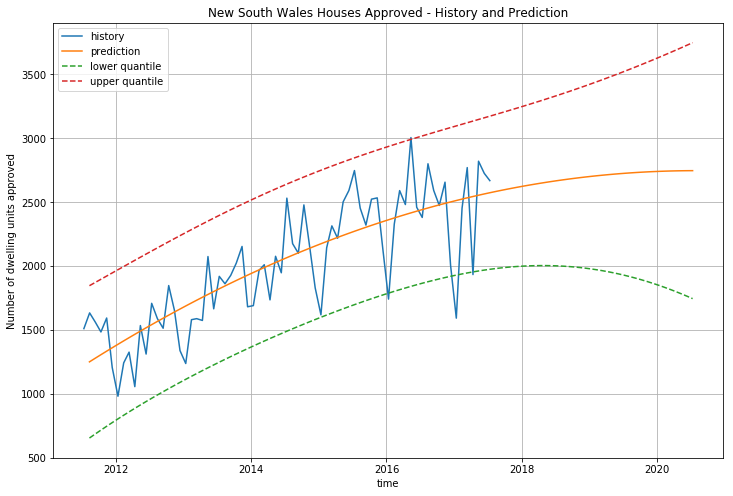

In [6]:
fig = plt.figure(figsize=(12,8))
history_and_prediction_plot(fig, ts, model_fit, regr, '2020-07-01', 'M', 0.05);

### Residual Analysis

The plot of the quadratic model shows a a sub-linear upwards trend. The diminishing growth in 2016/2017 is captured well. The quadratic term also causes a higher variance in the future and therefore diverging confidence intervals. In some sense, this can be interpreted as higher uncertainty of future predictions, although it is obviously not perfect.

In the summary of model fit, all three parameters are not significant anymore (p-values above 10%). This likely is an effect of multicollinearity and is a shortcoming of the OLS approach on functions of the time axis. The interpretability of the t-statistic and associated p-values is limited here. $R^2$ hardly changes in comparison to the linear model.

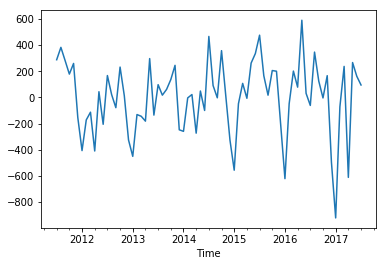

In [7]:
model_fit.resid.plot();

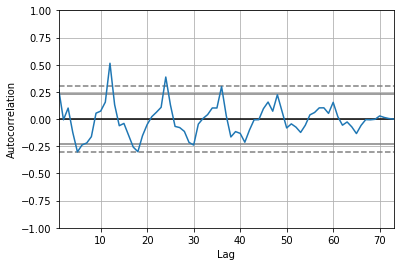

In [8]:
autocorrelation_plot(model_fit.resid);

Autocorrelation of the residuals is comparable to the original time series. As in the linear case we do not capture seasonality.

Adding a periodic term to the quadratic model with allows to capture seasonality. This can be found in [Quadratic and Cosine Model](4.2-OLS-with-periodic-regressor.ipynb).

[▲ Overview](0.0-Overview.ipynb)

[◀ Linear Model](4.0-Linear-model.ipynb)

[▶ Quadratic and Cosine Model](4.2-OLS-with-periodic-regressor.ipynb)